# Задание

DONE

    1) Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
    2) Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
    3) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
    4) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
    5) Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
    6) Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
    7) Формирование обучающей и тестовой выборок на основе исходного набора данных.
    8) Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
    9) Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
    10) Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
    11) Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.



## 1. Выбор и подготовка набора данных


Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных я должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.

В качестве набора данных мы будем использовать набор данных по прогнозирование сердечной недостаточности https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

Эта задача является очень актуальной для создания т.к. сердечной недостаточности являются причиной смерти номер 1 в мире, унося, по оценкам, 17,9 миллиона жизней каждый год, что составляет 31% всех смертей в мире. 

Датасет состоит из файла:

    heart_failure_clinical_records_dataset.txt - выборка

Каждый файл содержит следующие колонки:

    age - возраст (года)
    anaemia - Уменьшение количества эритроцитов или гемоглобина (логическое значение)
    creatinine_phosphokinase - Уровень фермента КФК в крови (мкг/л)
    diabetes - Если у пациента диабет (логическое значение)
    ejection_fraction - Процент крови, покидающей сердце при каждом сокращении (в процентах)
    high_blood_pressure - Если у пациента гипертония (логическое значение)
    platelets - Тромбоциты в крови (килограмм тромбоцитов/мл)
    serum_creatinine - Уровень сывороточного креатинина в крови (мг/дл)
    serum_sodium - Уровень натрия в сыворотке крови (мэкв/л)
    sex - Woman or man (binary)
    smoking - Если пациент курит или нет (логическое значение)
    time - Период наблюдения (дни)
    DEATH_EVENT - Если пациент умер в течение периода наблюдения (логическое значение)

В рассматриваемом примере будем решать обе задачу классификации:

    Для решения задачи классификации в качестве целевого признака будем использовать "DEATH_EVENT". Поскольку признак содержит только значения 0 и 1, то это задача бинарной классификации.

### Импорт библиотек

Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первых ячейках ноутбука.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

Дополнительные библиотеки для дополнения отчета

### Голова таблицы

In [4]:
data = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
print("Размер набора:")
print(f'В датасете {data.shape[0]} строк и {data.shape[1]} колонок.')

Размер набора:
В датасете 299 строк и 13 колонок.


Проведем удаление лишних столбцов.
Просмотрев все столбцы, оказалось, что они все нужны.

## 2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

Проверим пропуски:

In [7]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Как видим, пропуски отсутствуют

Проверим датасет на сбалансированность.

In [8]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [9]:
total = data.shape[0]
class_0, class_1 = data['DEATH_EVENT'].value_counts()
print('Сердечная недостаточность у {}%, а ее отсутствие составляет {}% в представленной выборке.'
      .format(round(class_1 / total, 4)*100, round(class_0 / total, 4)*100))

Сердечная недостаточность у 32.11%, а ее отсутствие составляет 67.89% в представленной выборке.


Вывод. Дисбаланс классов присутствует, но является приемлемым.

#### Построение графиков для понимания структуры данных

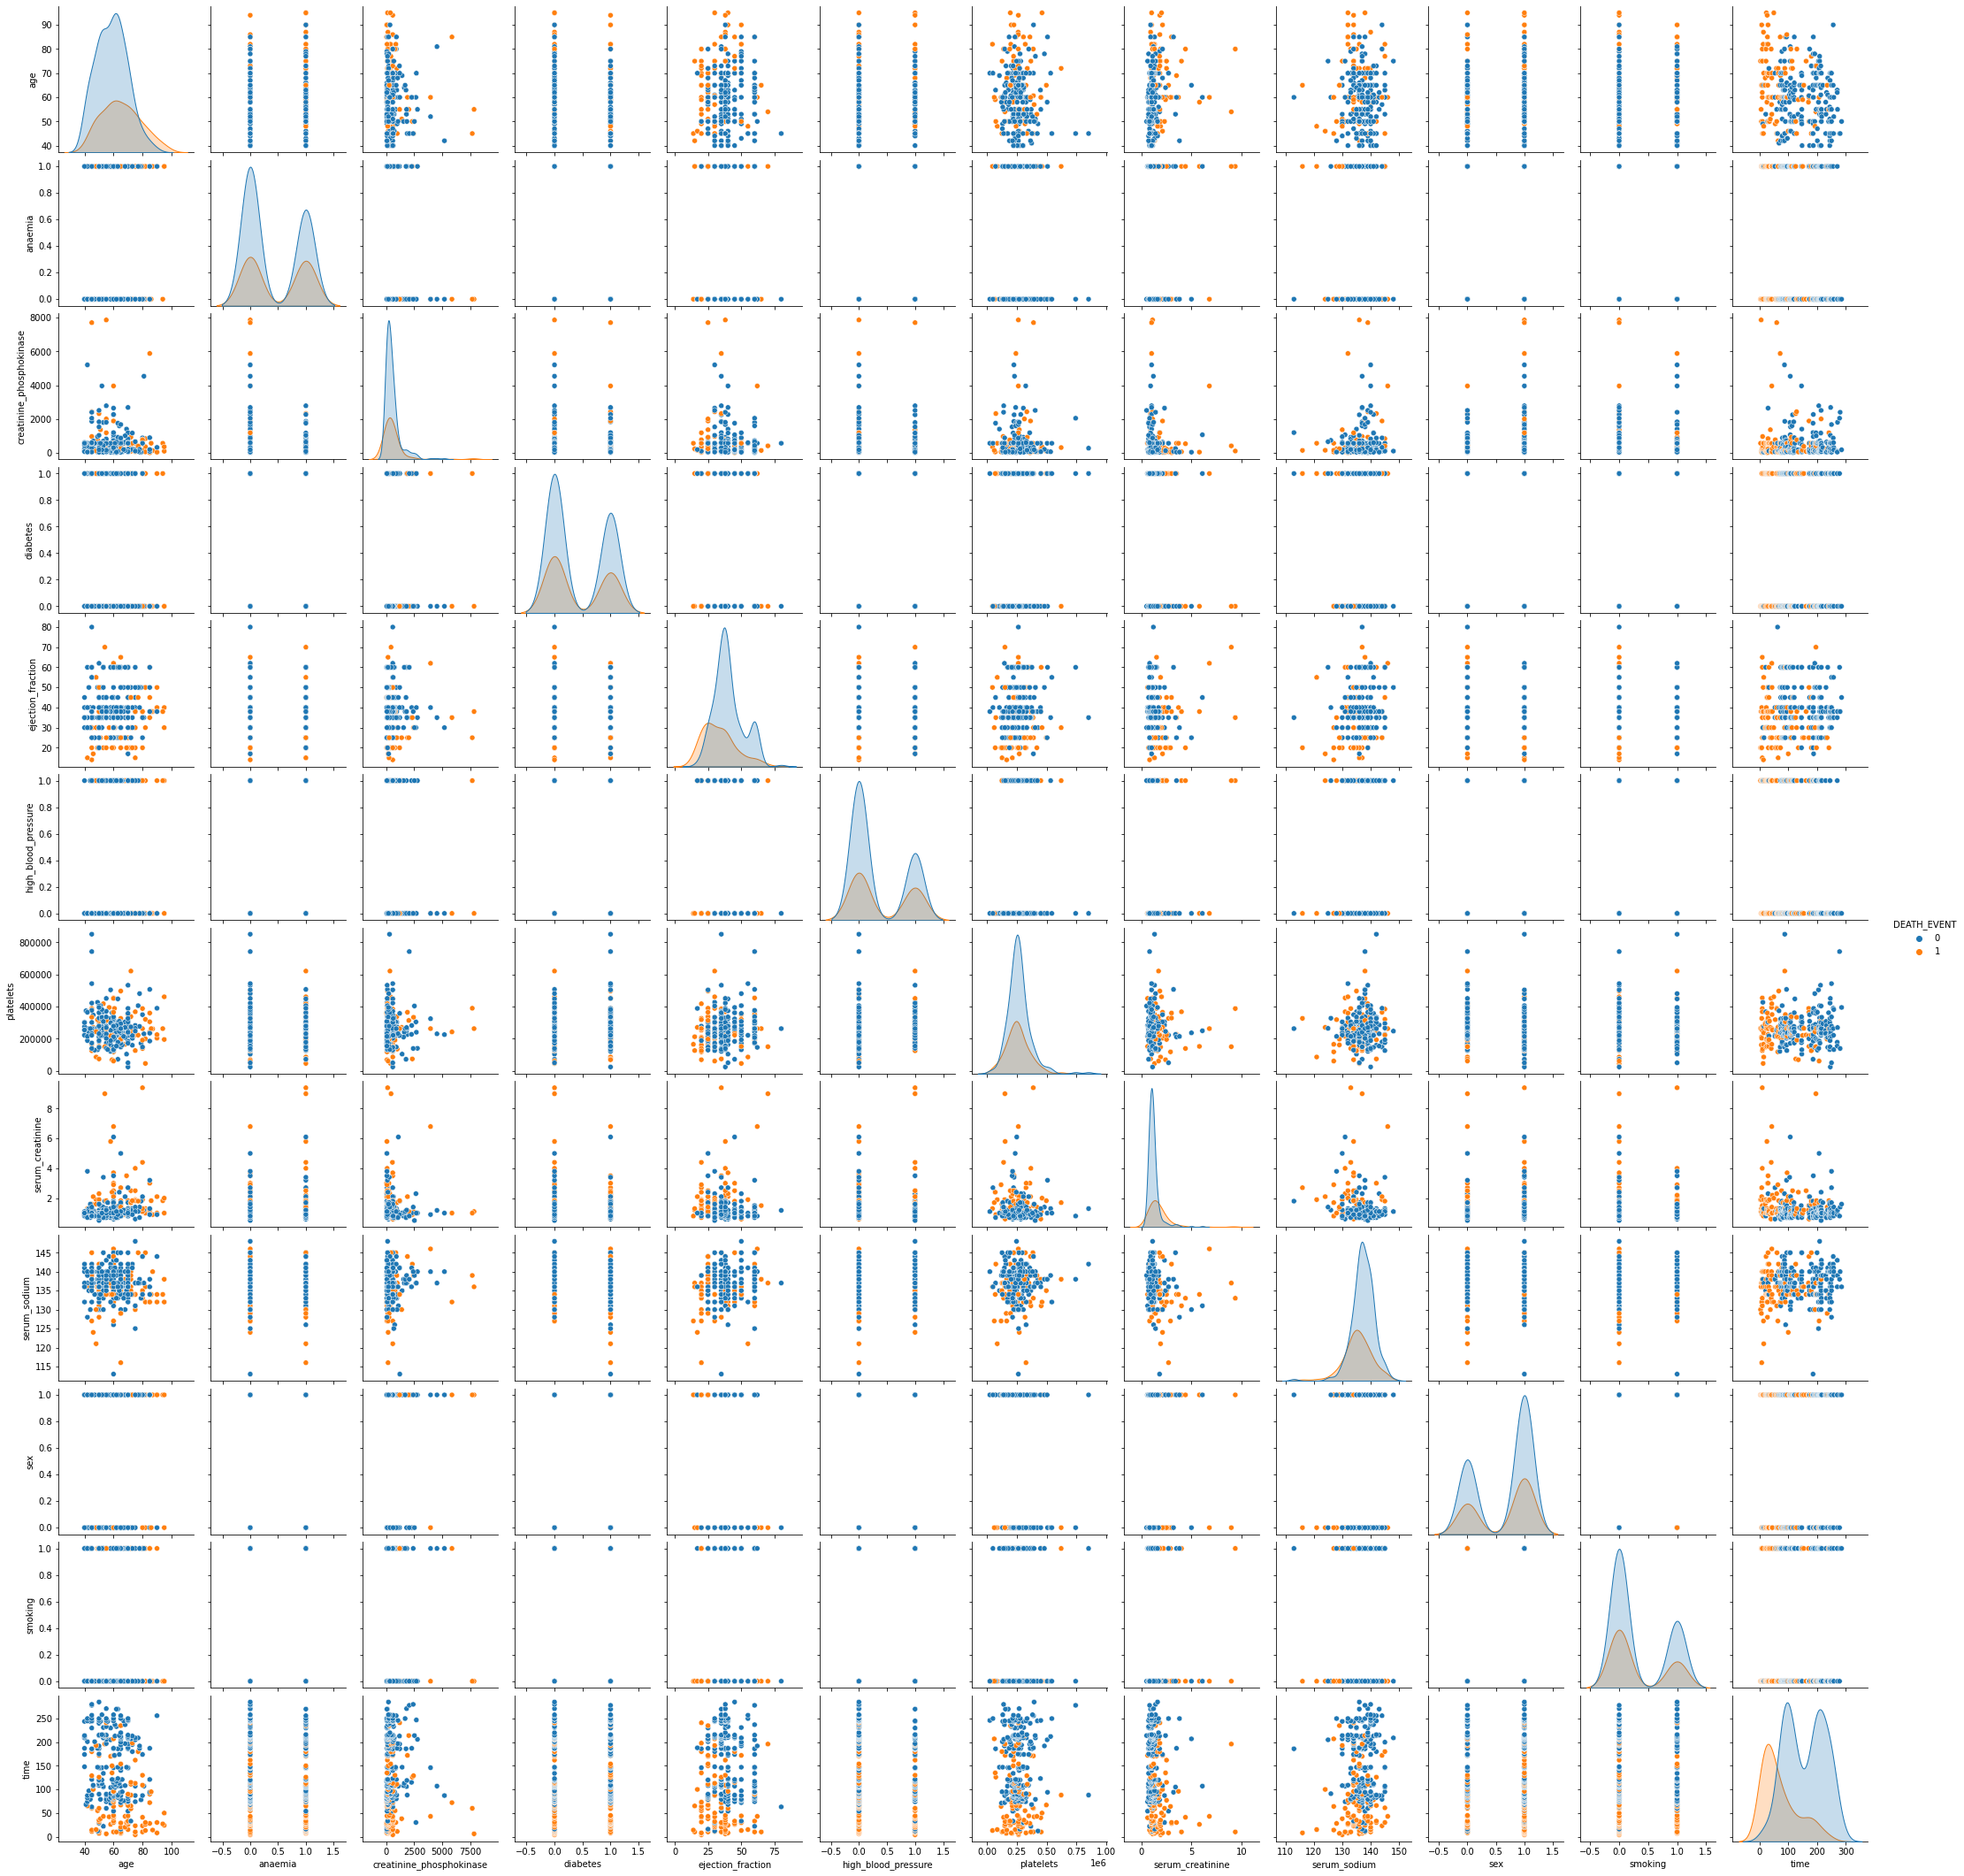

In [10]:
sns.pairplot(data, hue="DEATH_EVENT")

#### Убедимся, что целевой признак для задачи бинарной классификации содержит только 0 и 1

In [11]:
data['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

### Скрипичные диаграммы для числовых колонок

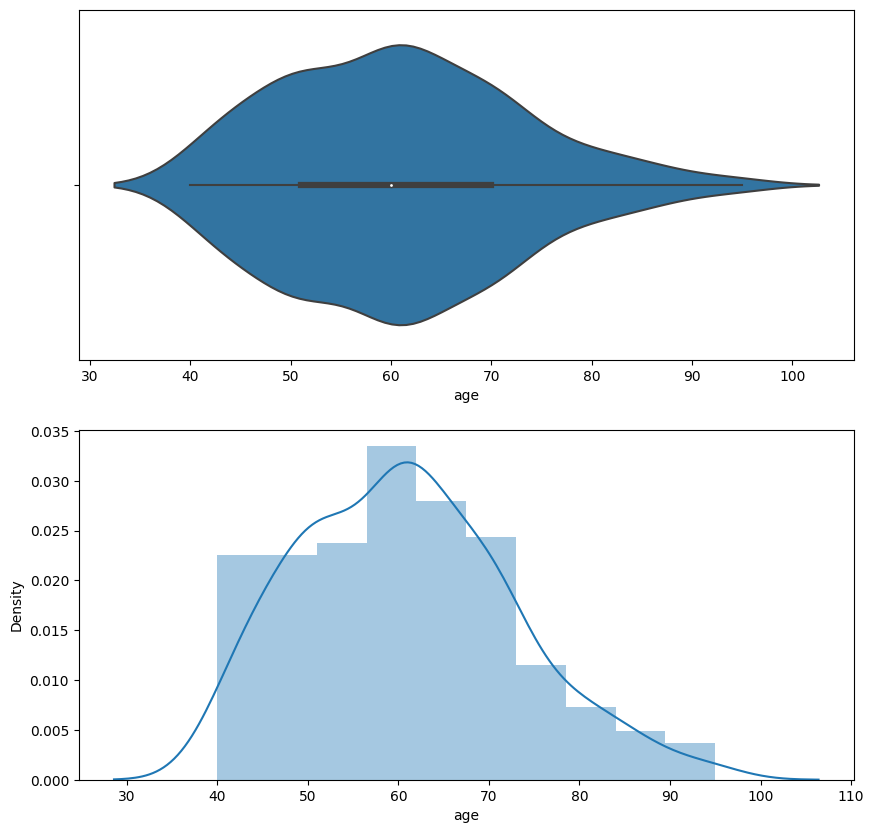

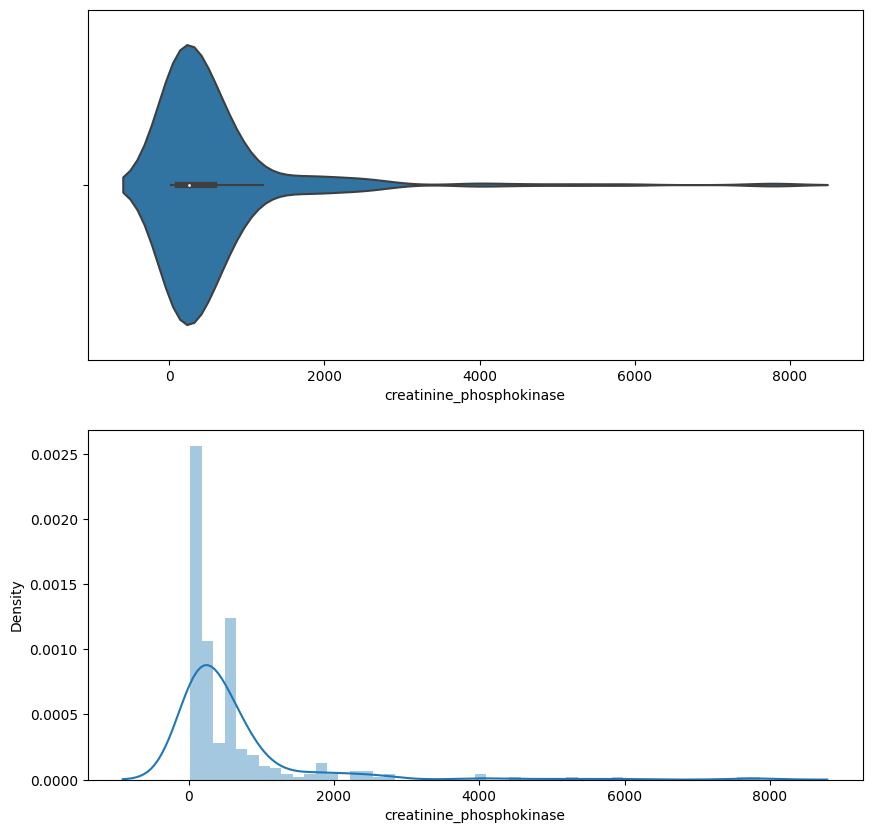

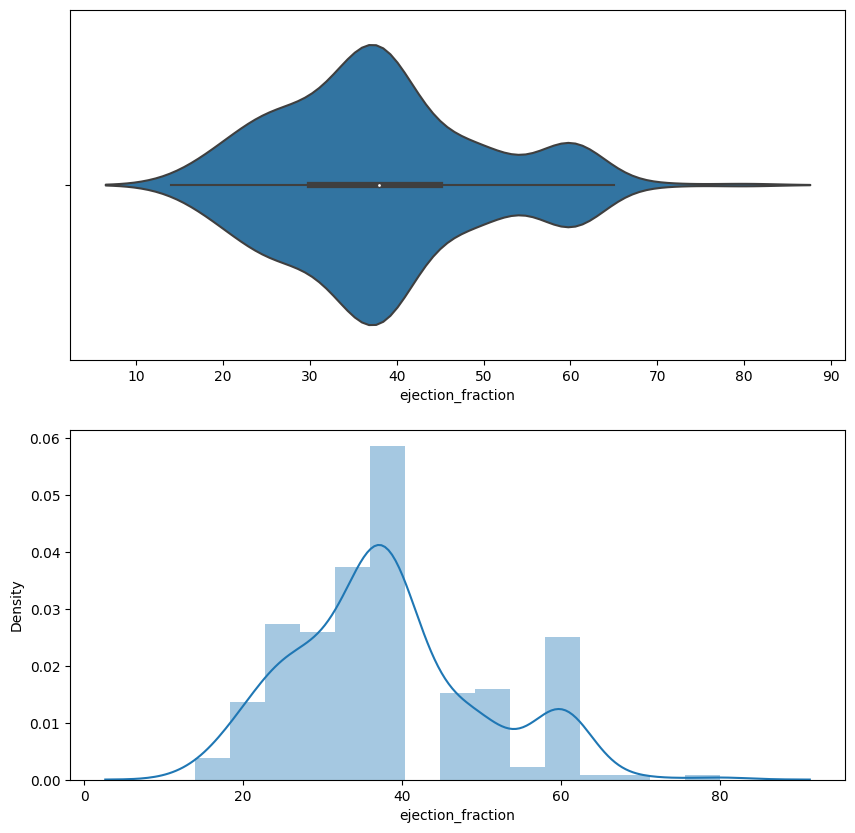

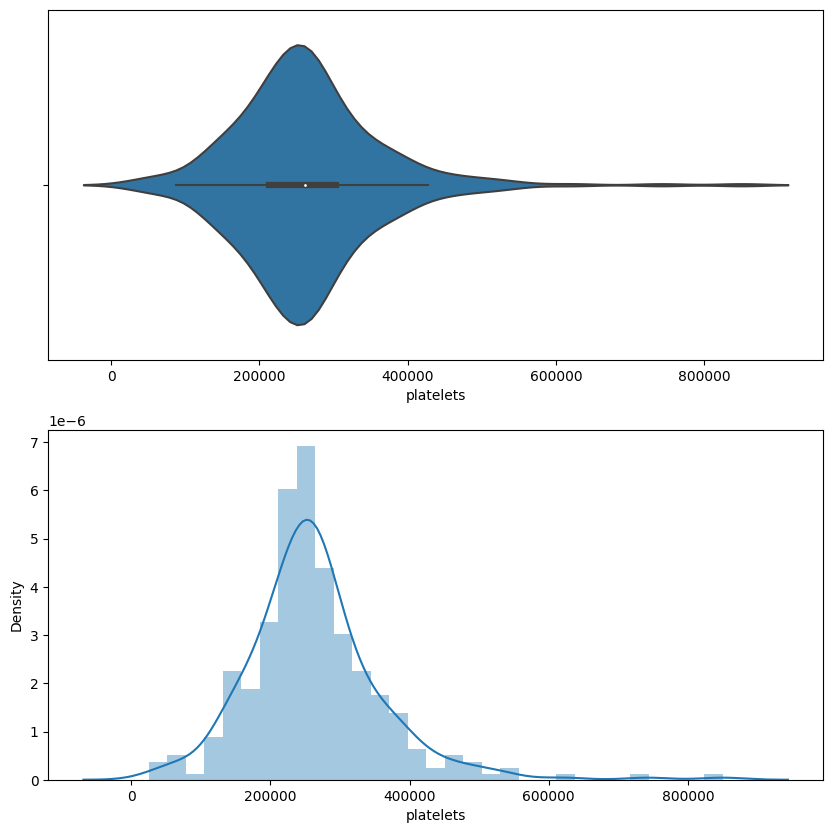

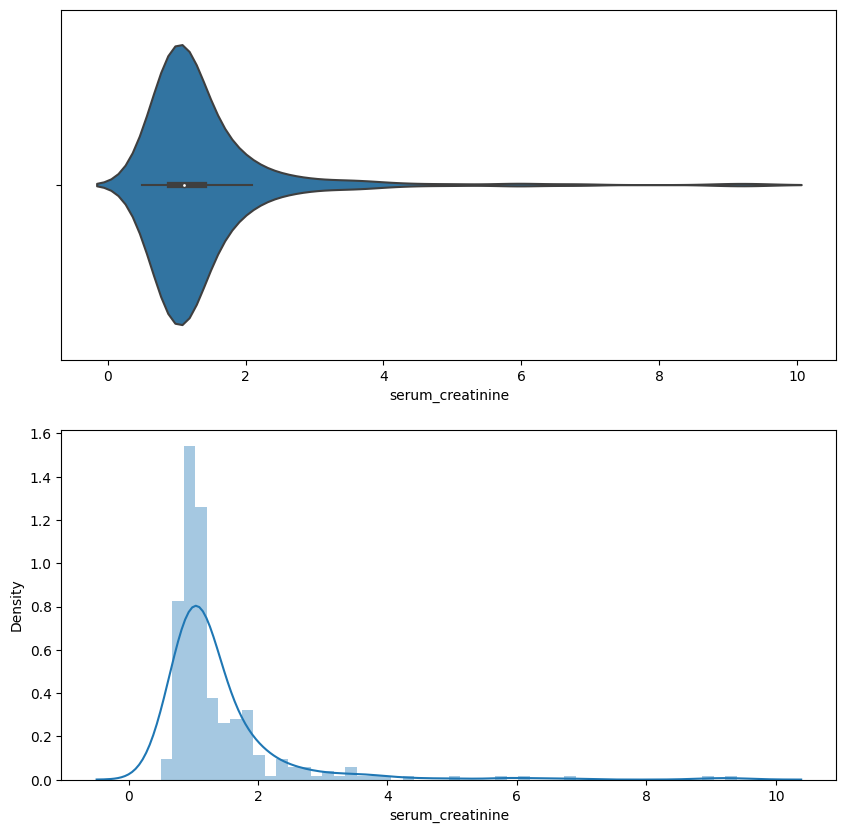

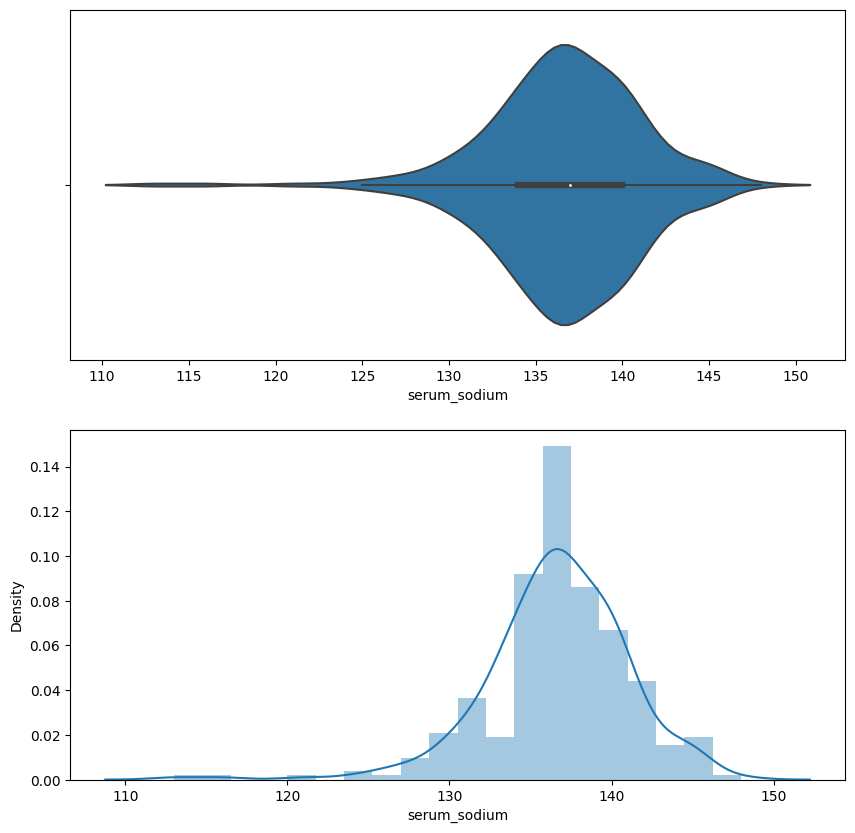

In [12]:

for col in ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']:

    fig, ax = plt.subplots(2, 1, figsize=(10,10))
    sns.violinplot(ax=ax[0], x=data[col])
    sns.distplot(data[col], ax=ax[1])

## 4. (Перед пунктом 3) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

<AxesSubplot:>

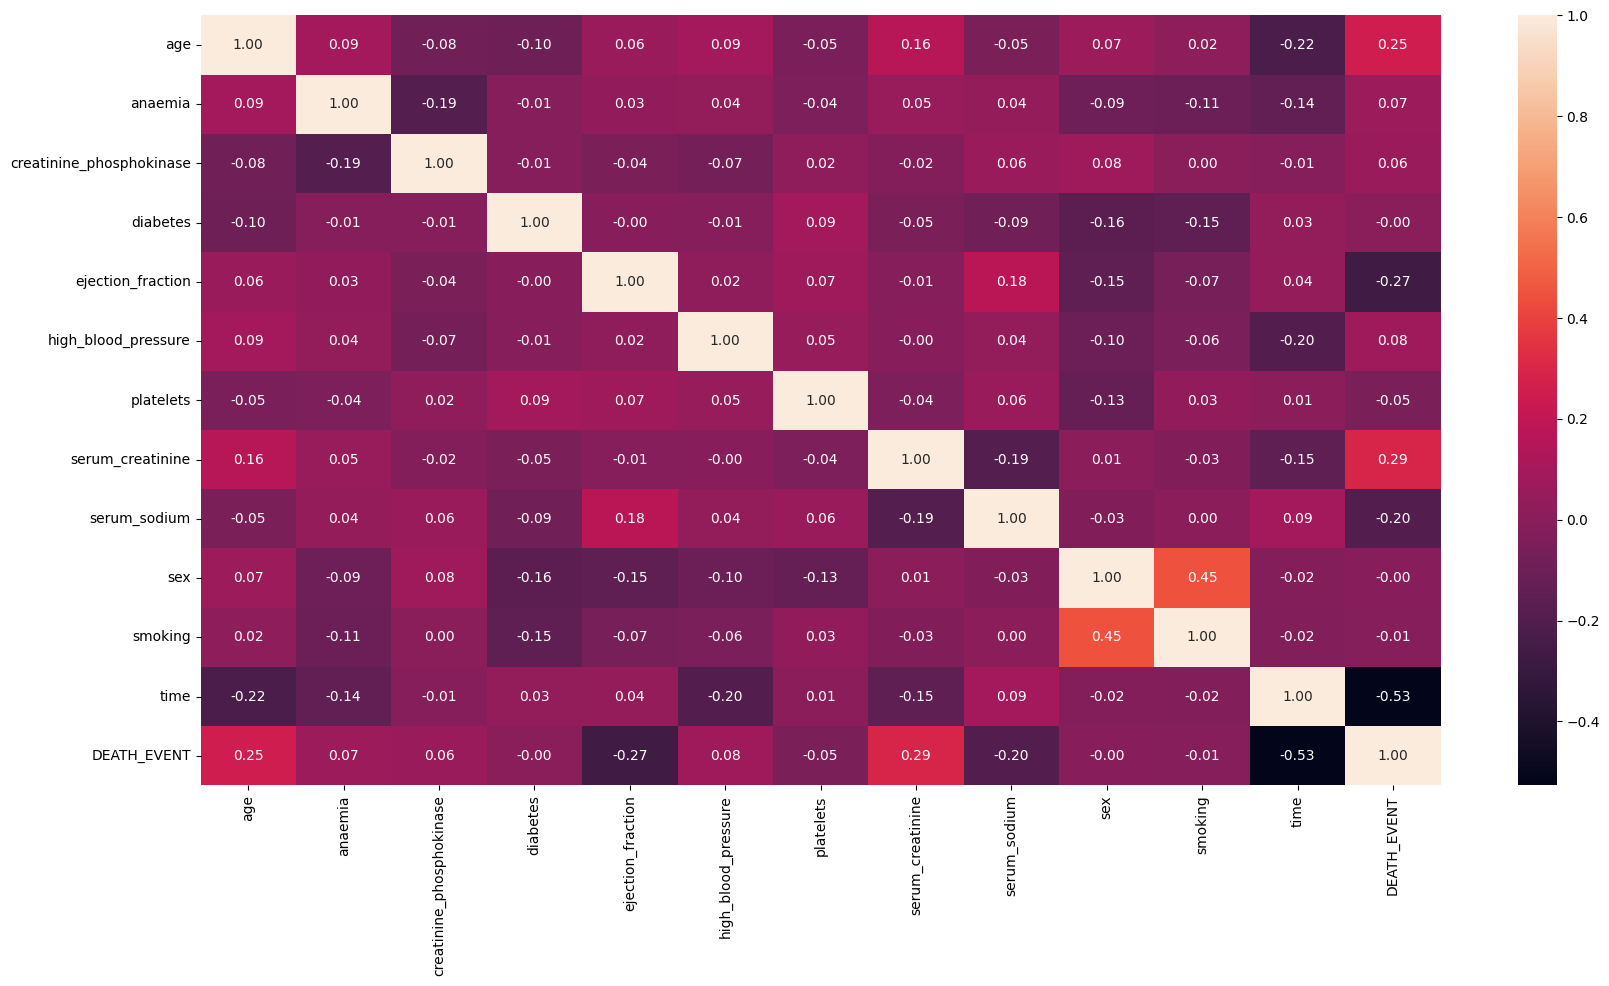

In [13]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

Мы не удалили некоторые категориальные параметры, которые могут влиять на общую картину.

Проверим их корелляцию с другими параметрами.

In [14]:
fig2 = px.violin(data, y="age", x="sex", color="DEATH_EVENT", box=True, points="all", hover_data=data.columns)
fig2.update_layout(title_text="Analysis in Age and Sex on Survival Status")

fig2.show()

In [15]:
fig2 = px.violin(data, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=data.columns)
fig2.update_layout(title_text="Analysis in Age and Smoking on Survival Status")

fig2.show()

In [16]:
fig2 = px.violin(data, y="age", x="diabetes", color="DEATH_EVENT", box=True, points="all", hover_data=data.columns)
fig2.update_layout(title_text="Analysis in Age and Diabetes on Survival Status")

fig2.show()



### На основе корреляционной матрицы и других графиков можно сделать следующие выводы:

    1) Целевой признак классификации "DEATH_EVENT" наиболее сильно коррелирует с возрастом (0,25); процент крови, покидающей сердце при каждом сокращении (0,27); уровень сывороточного креатинина в крови (0.29); уровень натрия в сыворотке крови (0,20) и период наблюдения в днях (0,53). Эти признаки обязательно следует оставить в модели классификации.

    2) У нас нет признаков которые имеют корреляцию, близкую по модулю к 1, поэтому никакие признаки не следуют исключать из модели по этому признаку.

    3) Однако у нас существуют признаки, которые близки по модулю к 0 по отношению к целевому параметру. Такие:
        a) diabetes - Если у пациента диабет                            (0.00)
        b) sex - Woman or man (binary)                                  (0.00)
        c) smoking - Если пациент курит или нет (логическое значение)   (0.01)
    
    4) Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком. На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

    5) В исследовании учавствовало меньше женщин, чем мужчин.


## 3. (После пункта 4) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [17]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Вспомогательные признаки для улучшения качества моделей мы строить не будем.

In [18]:
# Числовые колонки для масштабирования
scale_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

In [19]:
data_scaled = data

In [20]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_scaled[scale_cols])

In [21]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_scaled[new_col_name] = sc1_data[:,i]

In [22]:
data_scaled.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_scaled,creatinine_phosphokinase_scaled,ejection_fraction_scaled,platelets_scaled,serum_creatinine_scaled,serum_sodium_scaled,time_scaled
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235


Теперь удалим ненормализованные колонки

In [23]:
data_scaled = data_scaled.drop(scale_cols, axis=1)
data_scaled.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT,age_scaled,creatinine_phosphokinase_scaled,ejection_fraction_scaled,platelets_scaled,serum_creatinine_scaled,serum_sodium_scaled,time_scaled
0,0,0,1,1,0,1,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000
1,0,0,0,1,0,1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117
2,0,0,0,1,1,1,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676
3,1,0,0,1,0,1,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676
4,1,1,0,0,0,1,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235


In [24]:
data_scaled = data_scaled.reindex(columns=['age_scaled','anaemia','creatinine_phosphokinase_scaled','diabetes', 'ejection_fraction_scaled','high_blood_pressure','platelets_scaled','serum_creatinine_scaled','serum_sodium_scaled','sex','smoking','time_scaled','DEATH_EVENT'])

<AxesSubplot:>

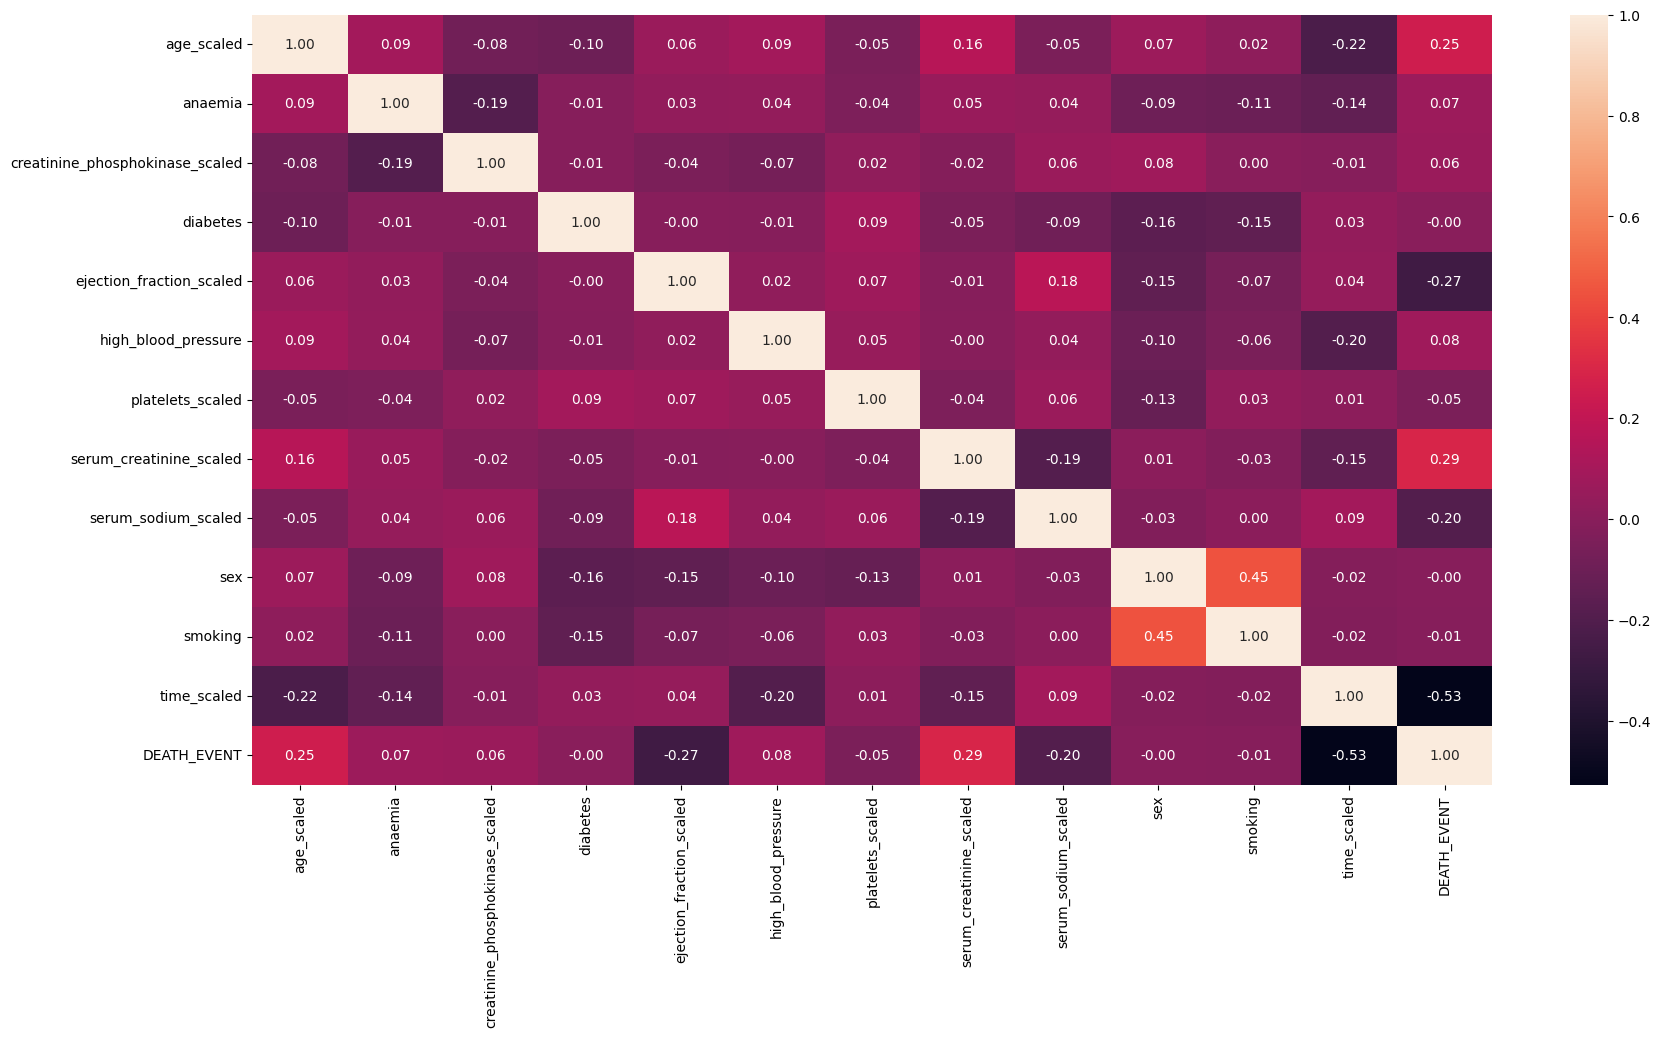

In [25]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(data_scaled.corr(), annot=True, fmt='.2f')

Так как таблица корелляции не была изменена после нормализации, мы можем продолжить работу.

## 5. Выбор метрик для последующей оценки качества моделей.

### В качестве метрик для решения задачи классификации  будем использовать:

Метрики, формируемые на основе матрицы ошибок:

#### Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$precision = \frac{TP}{TP+FP}$

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция [precision_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

#### Метрика recall (полнота):

$recall = \frac{TP}{TP+FN}$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция [recall_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

#### Метрика $F_1$-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_\beta$-мера, которая вычисляется как среднее гармоническое от precision и recall:

$F_\beta = (1+\beta^2) \cdot \frac{precision \cdot recall}{precision + recall}$

где $\beta$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $\beta=1$:

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

Для вычисления используется функция [f1_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

#### Метрика ROC AUC

Основана на вычислении следующих характеристик:

$TPR = \frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$FPR = \frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция [roc_auc_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

### В качестве метрик для решения задачи регрессии будем использовать:

#### [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) - средняя абсолютная ошибка

$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert  y_i - \hat{y_i} \rvert $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции [mean_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

#### [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) - средняя квадратичная ошибка

$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Вычисляется с помощью функции [mean_squared_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

#### [Метрика $R^2$ или коэффициент детерминации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) 

$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки
- $\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $

Вычисляется с помощью функции [r2_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

### Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [26]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## 6. Выбор наиболее подходящих моделей для решения задачи классификации

Для задачи классификации будем использовать следующие модели:
- Логистическая регрессия
- Метод ближайших соседей
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## 7. Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [27]:
X = data_scaled.drop('DEATH_EVENT', axis=1)
Y = data_scaled['DEATH_EVENT']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(209, 12), (90, 12)
(209,), (90,)


## 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [29]:
models =    {'LogR': LogisticRegression(),
            'KNN_3':KNeighborsClassifier(n_neighbors=3),
            'Tree':DecisionTreeClassifier(),
            'RF':RandomForestClassifier(),
            'GB':GradientBoostingClassifier()}

In [30]:
clasMetricLogger = MetricLogger()
accuracies = {}

In [31]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [32]:
clas_X_train = X_train
clas_Y_train = Y_train
clas_X_test = X_test
clas_Y_test = Y_test

In [33]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(clas_X_train, clas_Y_train)
    # Предсказание значений
    Y_pred = model.predict(clas_X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(clas_X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(clas_Y_test.values, Y_pred)
    recall = recall_score(clas_Y_test.values, Y_pred)
    f1 = f1_score(clas_Y_test.values, Y_pred)
    roc_auc = roc_auc_score(clas_Y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(clas_Y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, clas_X_test, clas_Y_test.values, ax=ax[1],
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

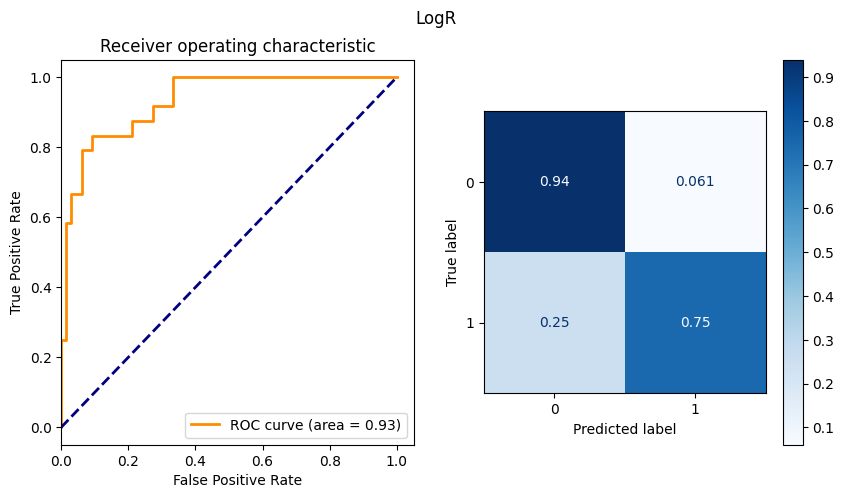

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        66
           1       0.82      0.75      0.78        24

    accuracy                           0.89        90
   macro avg       0.86      0.84      0.85        90
weighted avg       0.89      0.89      0.89        90

ROC AUC score: 0.9330808080808082
Accuracy Score:  0.8888888888888888


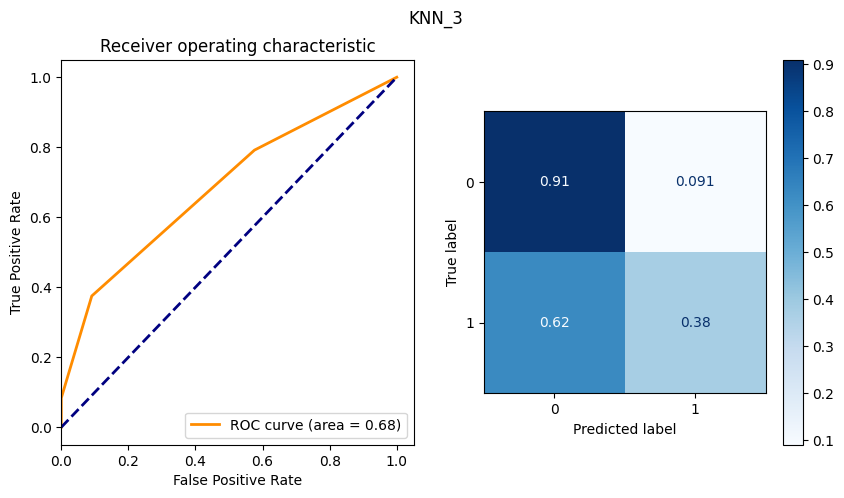

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        66
           1       0.60      0.38      0.46        24

    accuracy                           0.77        90
   macro avg       0.70      0.64      0.66        90
weighted avg       0.75      0.77      0.75        90

ROC AUC score: 0.6837121212121211
Accuracy Score:  0.7666666666666667


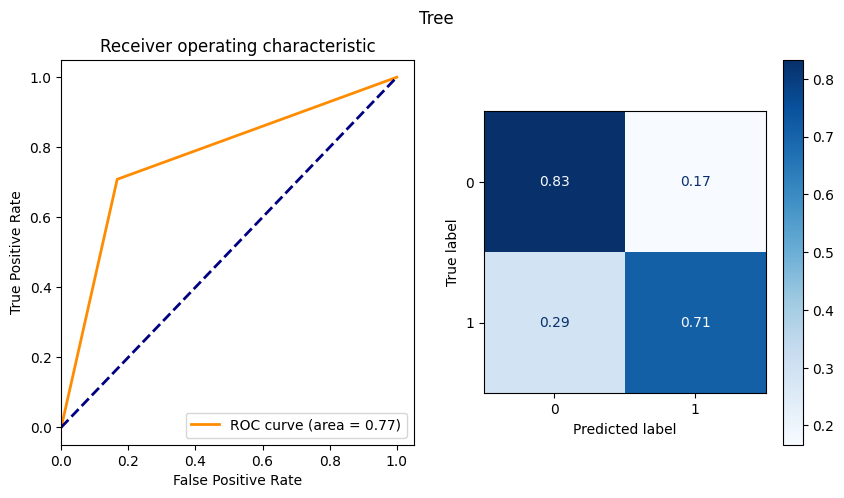

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        66
           1       0.55      0.67      0.60        24

    accuracy                           0.77        90
   macro avg       0.71      0.73      0.72        90
weighted avg       0.78      0.77      0.77        90

ROC AUC score: 0.7348484848484848
Accuracy Score:  0.7666666666666667


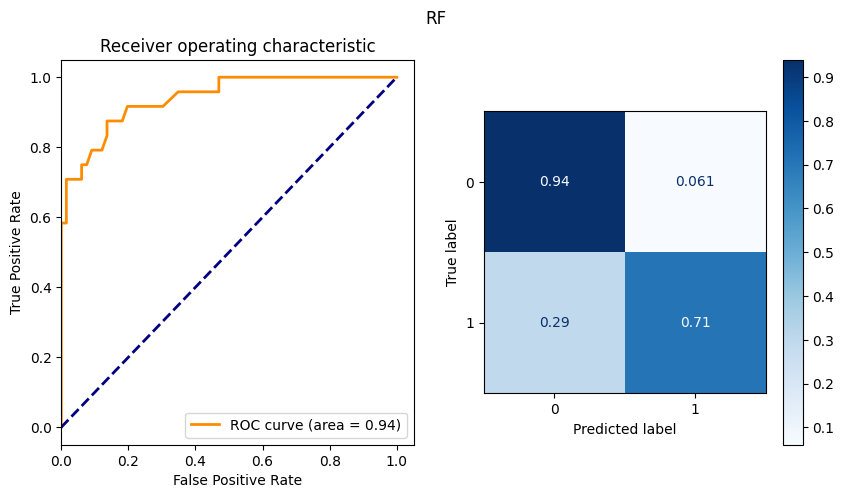

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        66
           1       0.87      0.83      0.85        24

    accuracy                           0.92        90
   macro avg       0.90      0.89      0.90        90
weighted avg       0.92      0.92      0.92        90

ROC AUC score: 0.9283459595959596
Accuracy Score:  0.9222222222222223


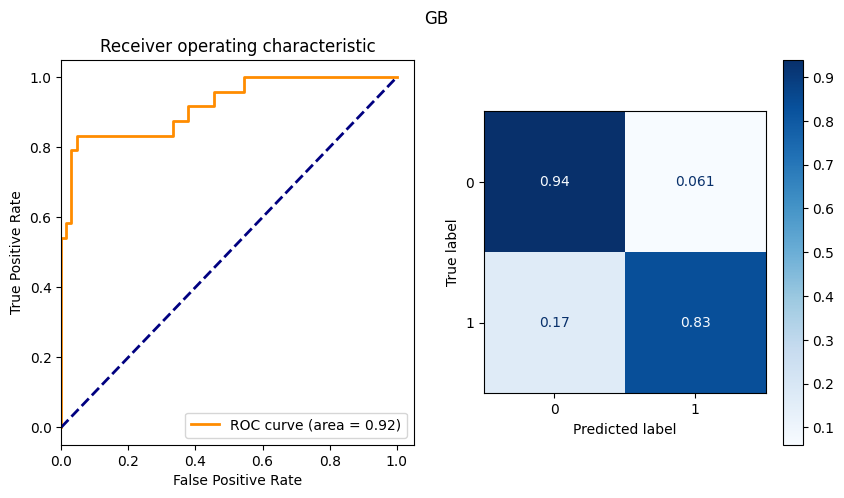

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       0.83      0.83      0.83        24

    accuracy                           0.91        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.91      0.91      0.91        90

ROC AUC score: 0.917929292929293
Accuracy Score:  0.9111111111111111


In [34]:
for model_name, model in models.items():
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    cm = confusion_matrix(Y_test, y_pred)

    clas_train_model(model_name, model, clasMetricLogger)

    print(classification_report(Y_test, y_pred))
    print(f'ROC AUC score: {roc_auc_score(Y_test, y_prob)}')
    print('Accuracy Score: ',accuracy_score(Y_test, y_pred))

    acc = accuracy_score(Y_test, y_pred)*100
    accuracies[model_name] = acc

## 9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [35]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]),
               (KNeighborsRegressor(), [{'n_neighbors':[1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]}]),
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (GradientBoostingClassifier(),[{'n_estimators':[10,20,50,100,150,200],'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}])]

In [36]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, Y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 76.06%
Best Parameters :  {'C': 1, 'random_state': 0}

----------------

KNeighborsRegressor():
Best Accuracy : 62.67%
Best Parameters :  {'n_neighbors': 1}

----------------

DecisionTreeClassifier():
Best Accuracy : 73.20%
Best Parameters :  {'criterion': 'gini', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 81.33%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 100, 'random_state': 0}

----------------

GradientBoostingClassifier():
Best Accuracy : 81.33%
Best Parameters :  {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 50, 'random_state': 0}

----------------



## 10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров.

Сравнение качества полученных моделей с качеством baseline-моделей.

In [37]:
models_params =    {'LogR': LogisticRegression(C = 1, random_state = 0),
                    'KNN_3':KNeighborsClassifier(n_neighbors = 1),
                    'Tree':DecisionTreeClassifier(criterion = 'gini', random_state = 0),
                    'RF':RandomForestClassifier(criterion = 'gini', n_estimators = 100, random_state = 0),
                    'GB':GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.5, loss = 'exponential', n_estimators = 50, random_state = 0)}
params_accuracies = {}

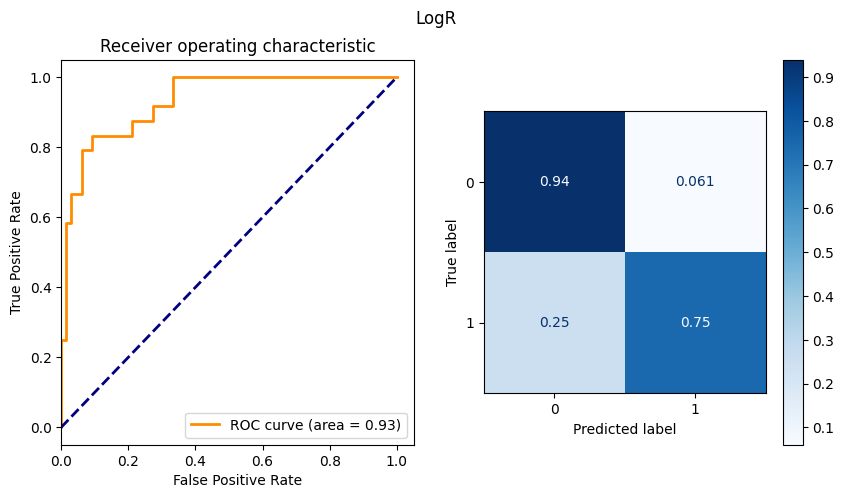

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        66
           1       0.82      0.75      0.78        24

    accuracy                           0.89        90
   macro avg       0.86      0.84      0.85        90
weighted avg       0.89      0.89      0.89        90

ROC AUC score: 0.9330808080808082
Accuracy Score:  0.8888888888888888


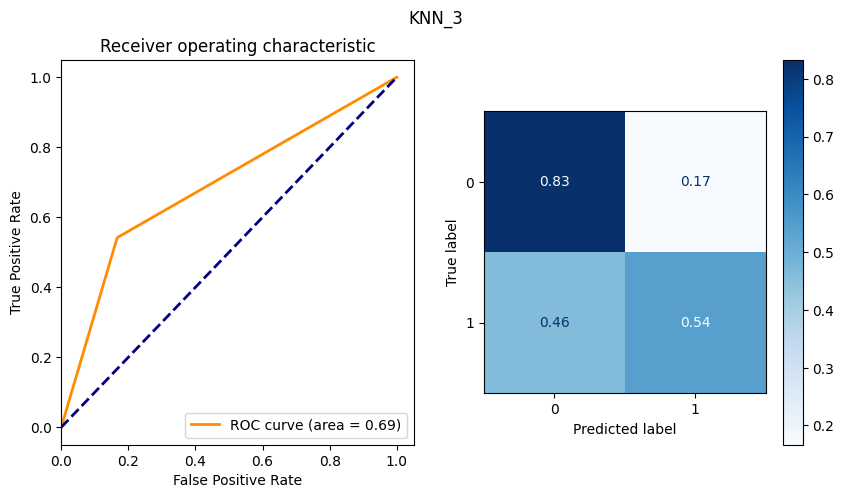

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        66
           1       0.54      0.54      0.54        24

    accuracy                           0.76        90
   macro avg       0.69      0.69      0.69        90
weighted avg       0.76      0.76      0.76        90

ROC AUC score: 0.6874999999999999
Accuracy Score:  0.7555555555555555


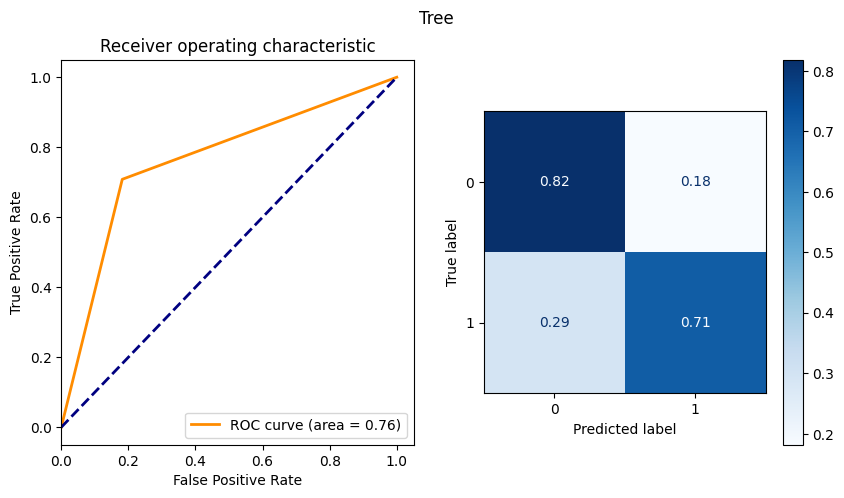

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        66
           1       0.59      0.71      0.64        24

    accuracy                           0.79        90
   macro avg       0.74      0.76      0.75        90
weighted avg       0.81      0.79      0.79        90

ROC AUC score: 0.7632575757575757
Accuracy Score:  0.7888888888888889


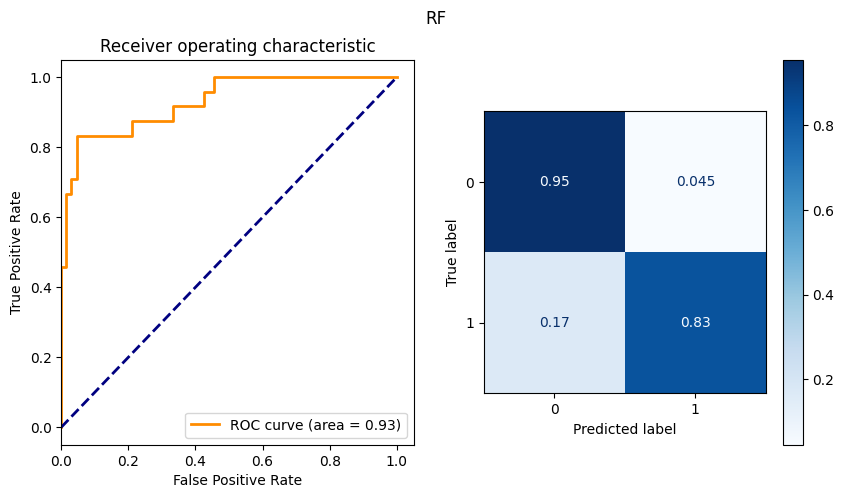

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        66
           1       0.87      0.83      0.85        24

    accuracy                           0.92        90
   macro avg       0.90      0.89      0.90        90
weighted avg       0.92      0.92      0.92        90

ROC AUC score: 0.9305555555555556
Accuracy Score:  0.9222222222222223


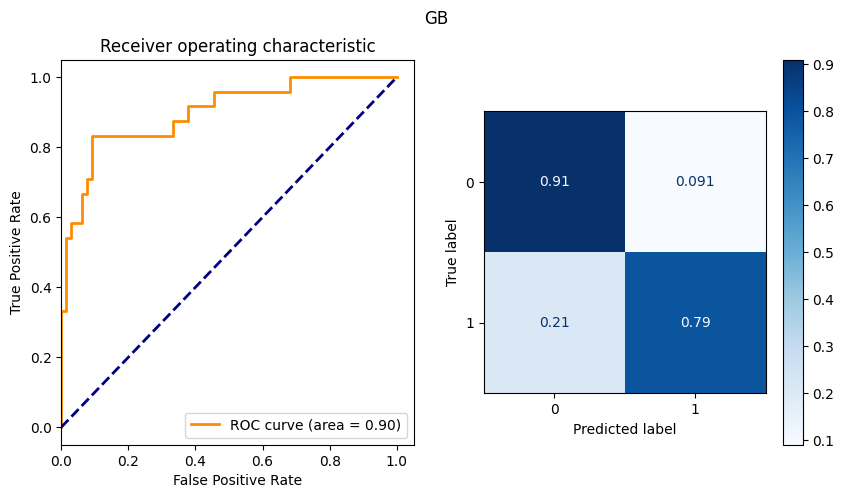

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        66
           1       0.76      0.79      0.78        24

    accuracy                           0.88        90
   macro avg       0.84      0.85      0.85        90
weighted avg       0.88      0.88      0.88        90

ROC AUC score: 0.898989898989899
Accuracy Score:  0.8777777777777778


In [38]:
for model_name, model in models_params.items():
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    cm = confusion_matrix(Y_test, y_pred)

    clas_train_model(model_name, model, clasMetricLogger)

    print(classification_report(Y_test, y_pred))
    print(f'ROC AUC score: {roc_auc_score(Y_test, y_prob)}')
    print('Accuracy Score: ',accuracy_score(Y_test, y_pred))

    param_acc = accuracy_score(Y_test, y_pred)*100
    params_accuracies[model_name] = param_acc

## 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

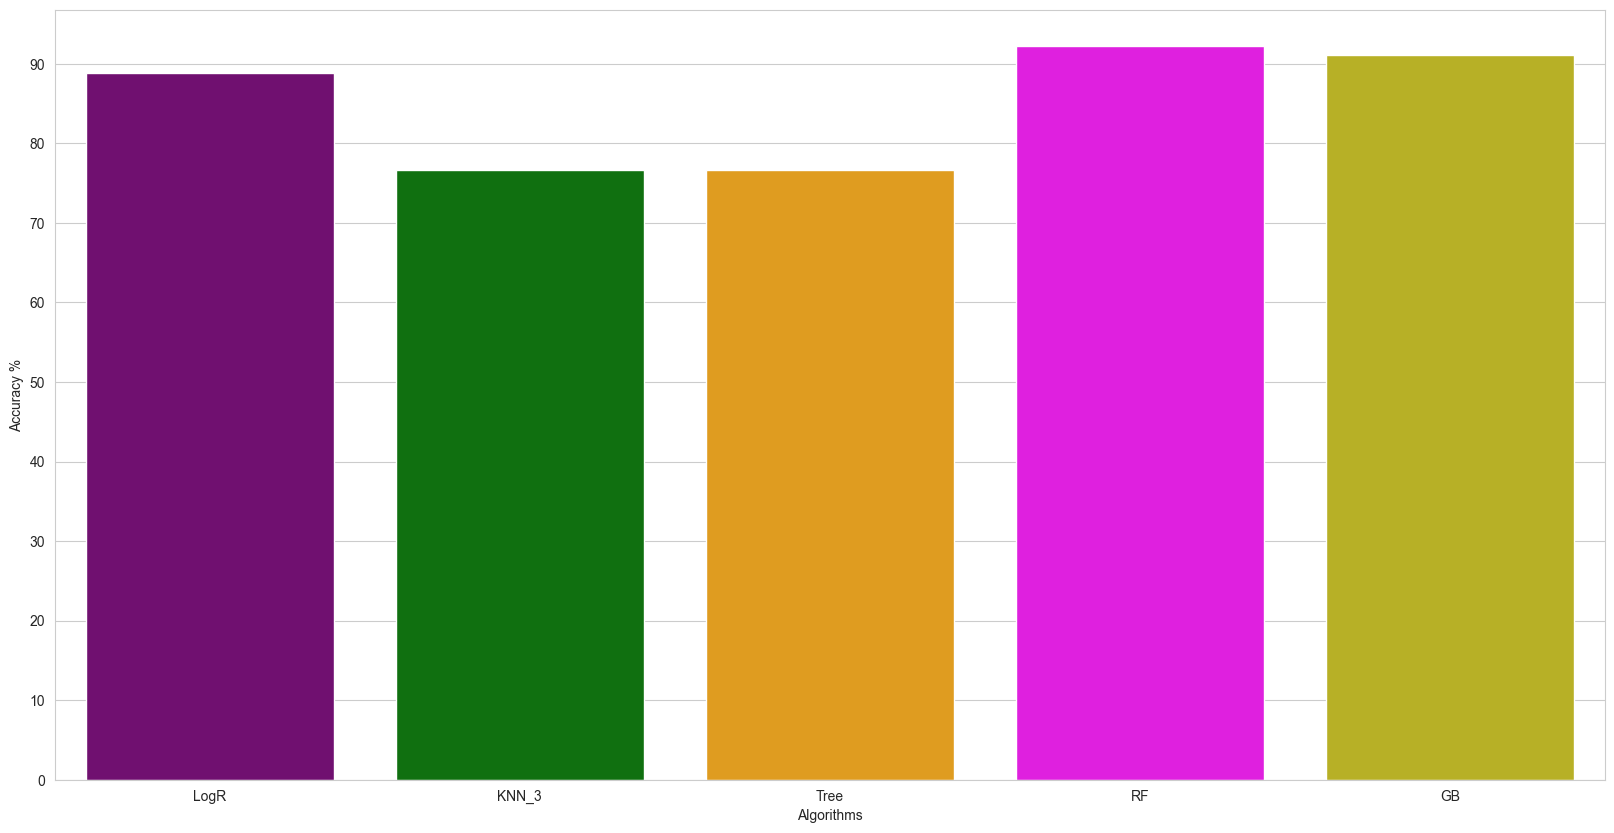

In [39]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'#417D7A','#066163','#4D4C7D']

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

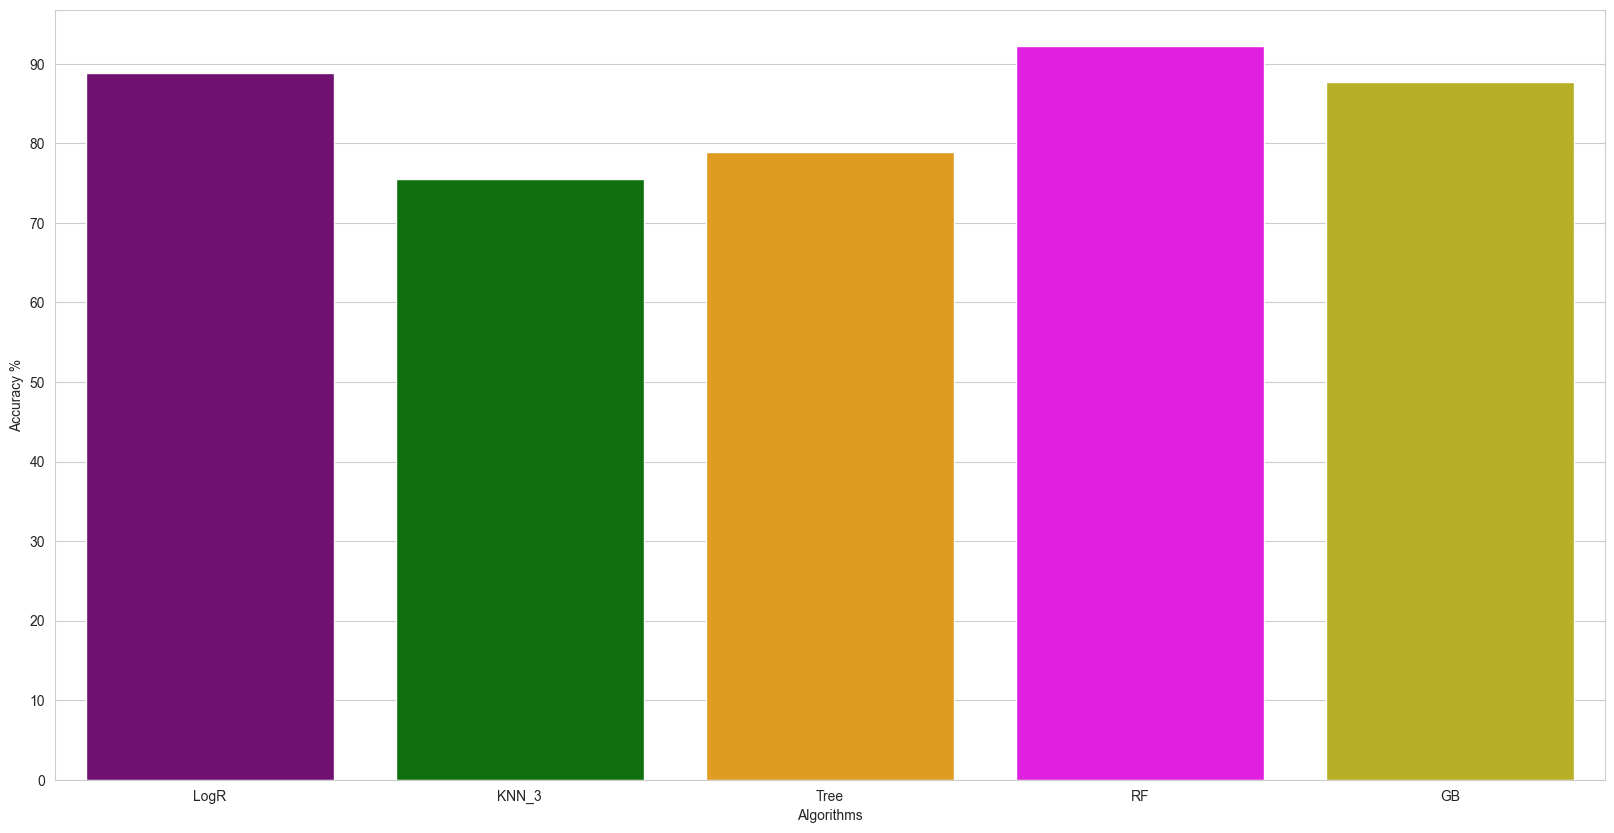

In [40]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'#417D7A','#066163','#4D4C7D']

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(params_accuracies.keys()), y=list(params_accuracies.values()), palette=colors)
plt.show()